In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy

#Data Visaulization Package :---
from pylab import rcParams
rcParams['figure.figsize']= 16,12
RANDOM_SEED =101
LABELS = ['Normal', 'Fraud']

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, auc, roc_curve

In [ ]:
import tensorflow as tf
import tensorflow.keras.models import Sequential

In [2]:
data = pd.read_csv('CreditCard.csv')
data.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


## Data Pre-Processing

In [3]:
# STEP 1 ==== Handling Missing Values

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values present in the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# STEP 2 ==== ENCODING TECHNICS

In [6]:
# STEP 3 ==== OUTLIER TREATMENT
# NOT REQUIRED

In [7]:
# STEP 4 ====  FEATURE SCALING

In [8]:
# STEP 5 ==== IMBALANCED DATASET CHECKING

data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Exploratory Data Analysis

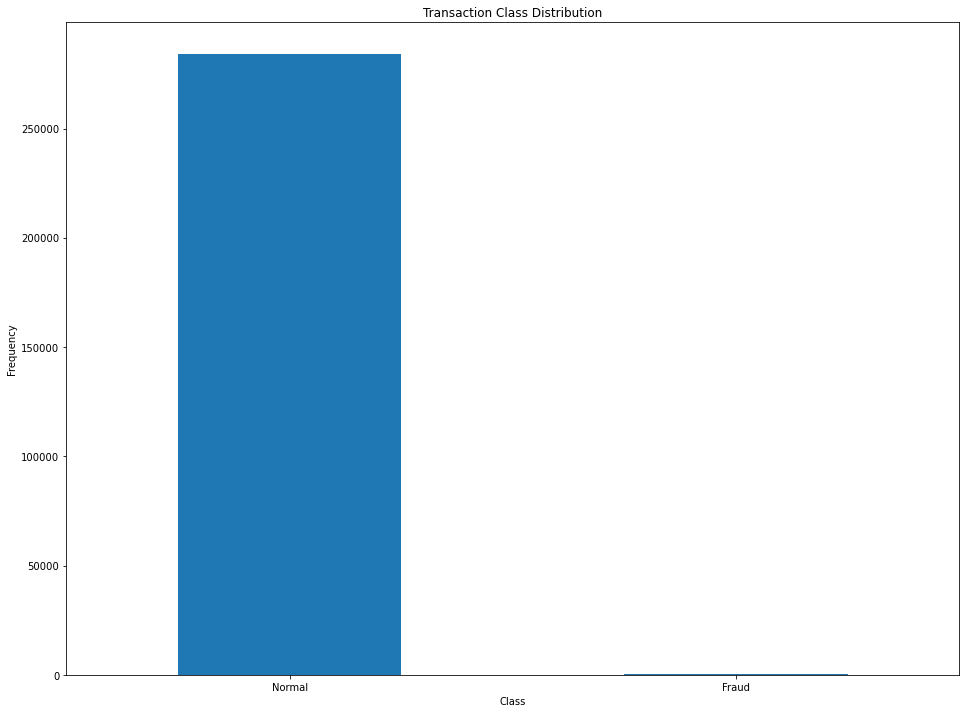

In [9]:
count_class = pd.value_counts(data['Class'], sort=True)
count_class.plot(kind='bar', rot=0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel('Frequency')
plt.show()

In [4]:
# Heere i wan to check how much fraud amount is taken

Fraud = data[data['Class']== 1]
Normal = data[data['Class'] == 0]

print(Fraud.shape, Normal.shape)

(492, 31) (284315, 31)


In [11]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

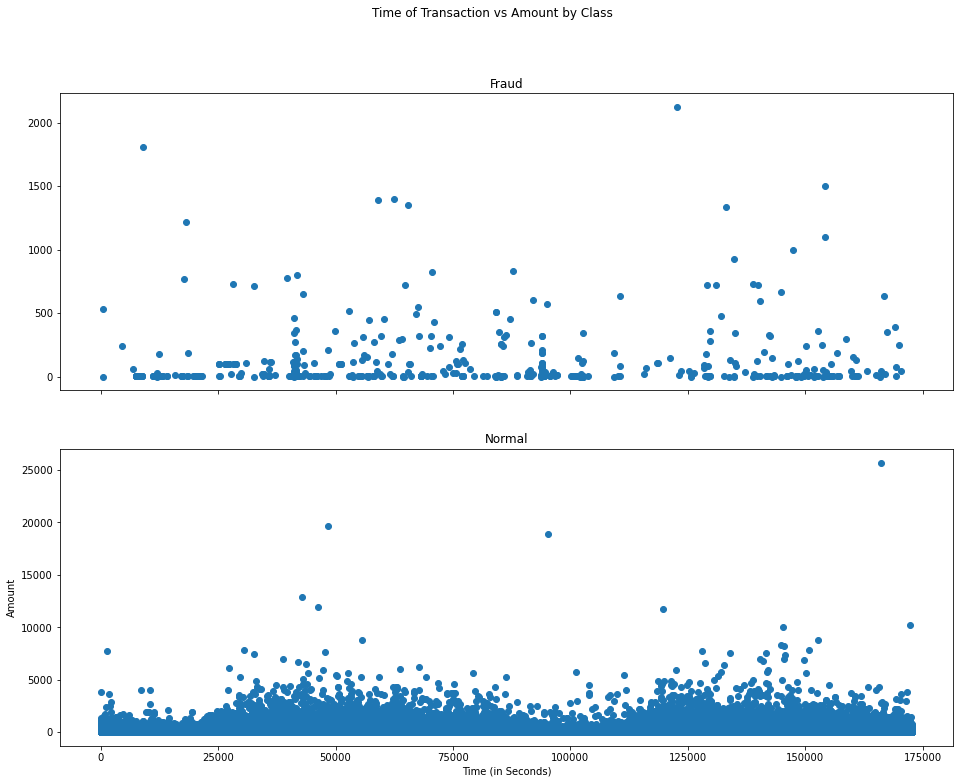

In [13]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle('Time of Transaction vs Amount by Class')

ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')

plt.xlabel("Time (in Seconds)")
plt.ylabel("Amount")

plt.show()

In [5]:
#Taking 10%of data for anaylsis
data1 = data.sample(frac=0.1, random_state=1)
data1.shape

(28481, 31)

### CORRELATION

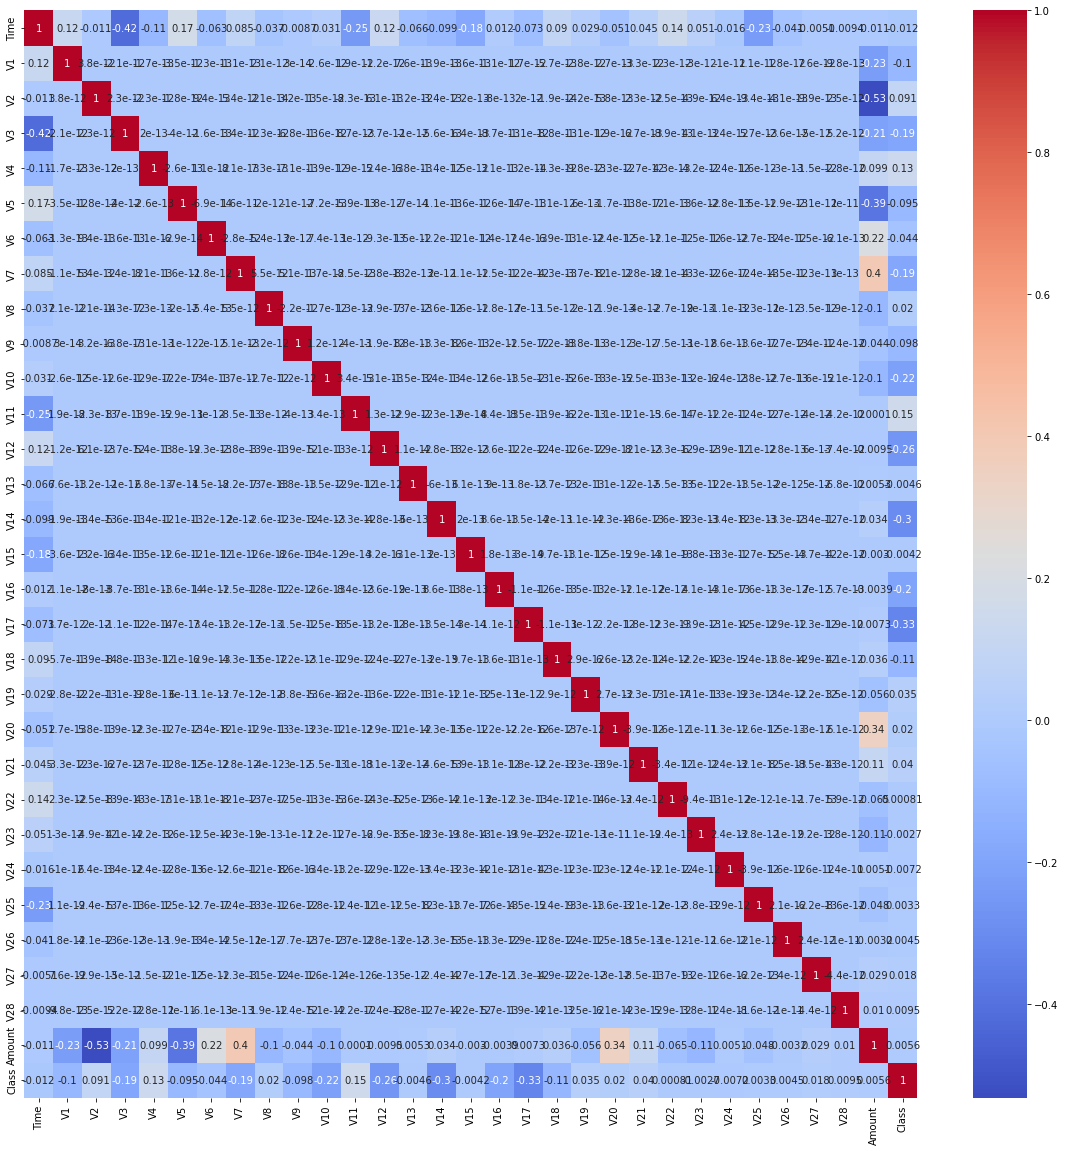

In [17]:
cormat = data.corr()
top_cor_feature = cormat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_cor_feature].corr(), annot=True, cmap='coolwarm')

In [6]:
from imblearn import over_sampling

In [7]:
X = data.iloc[:,0:30]
y = data['Class']

In [8]:
X.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [9]:
from sklearn.model_selection import train_test_split

X_Train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

## Without Handling Imbalanced Data

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_Train, y_train)

LogisticRegression()

In [33]:
y_pred_Train_lr = lr.predict(X_Train)
y_pred_test_lr = lr.predict(X_test)

In [65]:

print(confusion_matrix(y_train, y_pred_Train_lr))
print(confusion_matrix(y_test, y_pred_test_lr))

[[198913    103]
 [   127    221]]
[[85262    37]
 [   52    92]]


In [37]:
print(classification_report(y_train, y_pred_Train_lr))
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       0.68      0.64      0.66       348

    accuracy                           1.00    199364
   macro avg       0.84      0.82      0.83    199364
weighted avg       1.00      1.00      1.00    199364

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.71      0.64      0.67       144

    accuracy                           1.00     85443
   macro avg       0.86      0.82      0.84     85443
weighted avg       1.00      1.00      1.00     85443



### Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt =DecisionTreeClassifier()
dt.fit(X_Train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred_Train_dt = dt.predict(X_Train)
y_pred_test_dt = dt.predict(X_test)

In [40]:
print(accuracy_score(y_train,y_pred_Train_dt))
print(accuracy_score(y_test, y_pred_test_dt))

1.0
0.9991222218320986


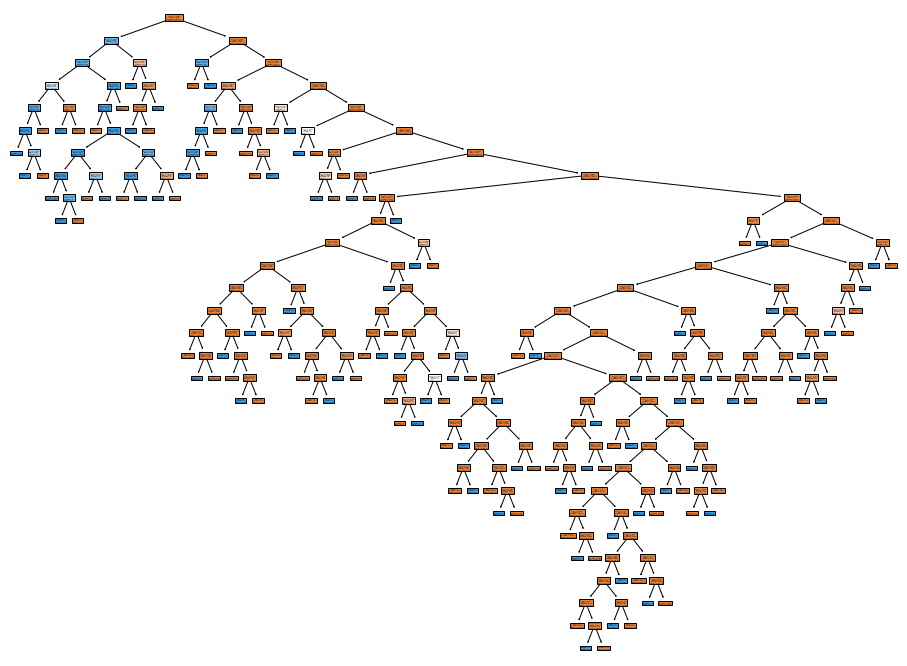

In [44]:
from sklearn import tree
tree.plot_tree(dt, filled=True)
plt.show()

### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, criterion='entropy')
rfc.fit(X_Train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [13]:
y_pred_Train_rfc = rfc.predict(X_Train)
y_pred_test_rfc = rfc.predict(X_test)

In [16]:
print(accuracy_score(y_train,y_pred_Train_rfc))
print(accuracy_score(y_test, y_pred_test_rfc))

1.0
0.9995786664794073


In [22]:
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_pred_test_rfc)
auc_rf = auc(fpr_rf, tpr_rf)

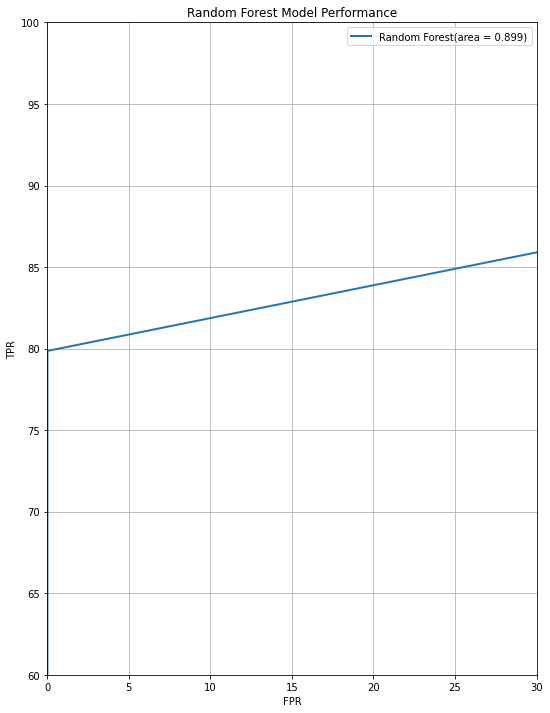

In [28]:
plt.plot(100*fpr_rf, 100*tpr_rf, label='Random Forest(area = {:.3f})'.format(auc_rf), linewidth=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0,30])
plt.ylim([60,100])
plt.grid(True)

ax = plt.gca()
ax.set_aspect('equal')
plt.title('Random Forest Model Performance')
plt.legend(loc='best')

### CatBoost

In [ ]:
#from catboostoost.datasets import amazon
#(train_df, tets_df) = amazon()

In [30]:
!pip install catboost

In [34]:
from catboost import CatBoostClassifier

In [35]:
cbc = CatBoostClassifier(iterations=100)
cbc.fit(X_Train, y_train)

Learning rate set to 0.5
0:	learn: 0.0199071	total: 202ms	remaining: 20s
1:	learn: 0.0045641	total: 231ms	remaining: 11.3s
2:	learn: 0.0032045	total: 256ms	remaining: 8.27s
3:	learn: 0.0028963	total: 277ms	remaining: 6.65s
4:	learn: 0.0027559	total: 296ms	remaining: 5.63s
5:	learn: 0.0024534	total: 317ms	remaining: 4.97s
6:	learn: 0.0023390	total: 337ms	remaining: 4.48s
7:	learn: 0.0022346	total: 361ms	remaining: 4.15s
8:	learn: 0.0021833	total: 381ms	remaining: 3.85s
9:	learn: 0.0021265	total: 410ms	remaining: 3.69s
10:	learn: 0.0020813	total: 438ms	remaining: 3.54s
11:	learn: 0.0019785	total: 462ms	remaining: 3.39s
12:	learn: 0.0018932	total: 482ms	remaining: 3.23s
13:	learn: 0.0018029	total: 503ms	remaining: 3.09s
14:	learn: 0.0017667	total: 524ms	remaining: 2.97s
15:	learn: 0.0017018	total: 544ms	remaining: 2.85s
16:	learn: 0.0016687	total: 567ms	remaining: 2.77s
17:	learn: 0.0016119	total: 589ms	remaining: 2.69s
18:	learn: 0.0015810	total: 616ms	remaining: 2.63s
19:	learn: 0.00155

In [36]:
y_pred_train_cbc = cbc.predict(X_Train)
y_pred_test_cbc = cbc.predict(X_test)

In [38]:
print(classification_report(y_train,y_pred_train_cbc))
print('='*80)
print(classification_report(y_test,y_pred_test_cbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199016
           1       1.00      0.95      0.97       348

    accuracy                           1.00    199364
   macro avg       1.00      0.98      0.99    199364
weighted avg       1.00      1.00      1.00    199364

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.96      0.78      0.86       144

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [40]:
fpr_cbc,tpr_cbc,threshold_cbc = roc_curve(y_test, y_pred_test_cbc)
auc_cbc = auc(fpr_cbc, tpr_cbc)

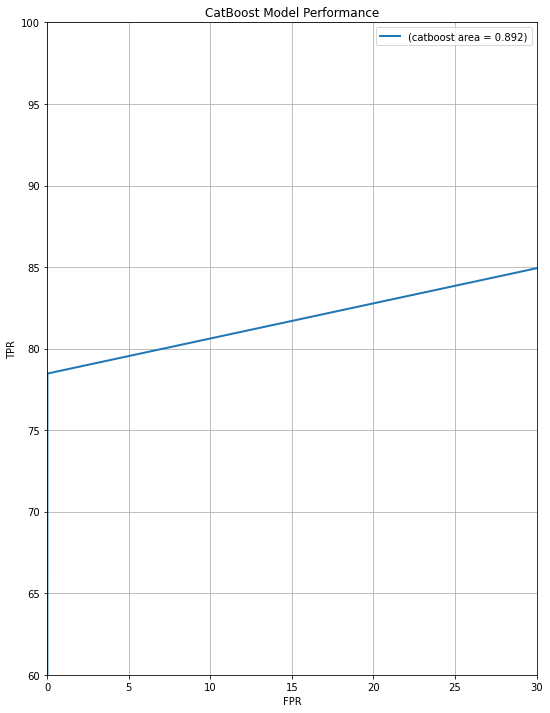

In [42]:
plt.plot(100*fpr_cbc, 100*tpr_cbc, label='(catboost area = {:.3f})'.format(auc_cbc), linewidth=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0,30])
plt.ylim([60,100])
plt.grid(True)

ax = plt.gca()
ax.set_aspect('equal')
plt.title('CatBoost Model Performance')
plt.legend(loc='best')

### XGBoost

In [48]:
!pip install xgboost

In [49]:
from xgboost import XGBClassifier

In [51]:
xgboost = XGBClassifier()
xgboost.fit(X_Train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [52]:
y_pred_Train_xgb = xgboost.predict(X_Train)
y_pred_test_xgb = xgboost.predict(X_test)

In [53]:
print(accuracy_score(y_train, y_pred_Train_xgb))
print(accuracy_score(y_test, y_pred_test_xgb))

1.0
0.9995786664794073


## Stacking Classifier

In [55]:
!pip install mlxtend

In [57]:
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=7)
clf2 = GaussianNB()
clf3 = RandomForestClassifier()
clf4 = DecisionTreeClassifier()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=clf4) # meta_classifier means base classifier


### ISOLATION FOREST, LOCAL OUTLIER FACTOR

1. Isolation Forest is an unsupervised learning method, meaning that it does not require any truth-marking to make predictions, and only learns from patterns it finds in the training data.
2. Isolation Forest is a tree-based algorithm used for anomaly detection. The algorithm works by using decision trees to isolate outliers from the data
3. In theory, our fraud population should mostly consist of data points that are abnormal compared to the rest of our transactions. Thus, this is a perfect solution to try to identify fraud when we don’t have any labels.

In [43]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.svm import OneClassSVM

In [44]:
Classification = {"Isolation Forest" : IsolationForest(n_estimators=100, max_samples=len(X),
                                                      contamination= 0.017 ),
                 "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination= 0.017),
                " One Class SVM": OneClassSVM()}

In [ ]:
n_outlier = len(Fraud)

for i ,(clf_name, clf) in enumerate(Classification.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name == 'One Class SVM':
        clf.fit(X)
        y_pred = clf.predict(X)
        
    else:
        clf.fit(X)
        score_prediction = clf.decision_function(X)
        y_pred= clf.predict(X)
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_error =(y_pred != y).sum()
    
    print('{} : {}'.format(clf_name, n_error))
    print('Accuracy Score :')
    
    print(accuracy_score(y, y_pred))
    print("Classification Report....")
    print(classification_report(y, y_pred))

Isolation Forest : 4582
Accuracy Score :
0.983911912277437
Classification Report....
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.08      0.76      0.14       492

    accuracy                           0.98    284807
   macro avg       0.54      0.87      0.57    284807
weighted avg       1.00      0.98      0.99    284807

Local Outlier Factor : 5114
Accuracy Score :
0.9820439806605877
Classification Report....
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.02      0.22      0.04       492

    accuracy                           0.98    284807
   macro avg       0.51      0.60      0.52    284807
weighted avg       1.00      0.98      0.99    284807



### Deep Neural Network